In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.interpolate import make_interp_spline, CubicSpline, make_smoothing_spline
from scipy.signal import savgol_filter

In [42]:
df2 = pd.read_csv("../output/fig_2_lfcs.csv", index_col=0)
df3 = pd.read_csv("../output/geom_smooth_plot_2_fpr_data.csv", index_col=0)
df4 = pd.read_csv("../output/geom_smooth_plot_2_power_data.csv", index_col=0)

In [43]:
d = {6: "ALDEx2-GTT: $\\theta^\\perp \\in [0, 1.75]$", 8: "ANCOM-BC", 7: "ALDEx2-GTT: $\\theta^\\perp \\in [1, 1.75]$",
     1: "ALDEx2", 2: "ALDEx2-CTT: $\\theta^\\perp \\in [0, 0.5]$", 3: "ALDEx2-CTT: $\\theta^\\perp \\in [0, 1.75]$",
     4: "ALDEx2-CTT: $\\theta^\\perp \\in [1, 1.75]$", 5: "ALDEx2-GTT: $\\theta^\\perp \\in [0, 0.5]$",
     9: "DESeq2", 10: "edgeR", 11: "limma", 12: "LinDA"} # 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 # ""
sorter = ["ALDEx2", "limma", "edgeR", "DESeq2", "ANCOM-BC", "LinDA", "ALDEx2-CTT: $\\theta^\\perp \\in [1, 1.75]$",
          "ALDEx2-CTT: $\\theta^\\perp \\in [0, 0.5]$", "ALDEx2-CTT: $\\theta^\\perp \\in [0, 1.75]$",
          "ALDEx2-GTT: $\\theta^\\perp \\in [1, 1.75]$", "ALDEx2-GTT: $\\theta^\\perp \\in [0, 0.5]$",
          "ALDEx2-GTT: $\\theta^\\perp \\in [0, 1.75]$"]

#df3 = df3[df3['group'].isin([1,2,3,4,5,6])]
df3["group"] = df3["group"].map(d)
#df4 = df4[df4['group'].isin([1,2,3,4,5,6])]
df4["group"] = df4["group"].map(d)
df3.sort_values(by="group", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)
df4.sort_values(by="group", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

main_plot = True
if main_plot:
    palette = ['#000000', '#777777', '#9F9F9F', '#DDDDDD', '#000000', '#777777',
       '#d62728', '#d62728', '#1f77b4', '#1f77b4']
    dashes = [(1,1), (1,1), (1,1), (1,1), (3,1), (3,1), (3,1), (1,0), (3,1), (1,0)]
    df3 = df3.loc[~df3["group"].isin(["ALDEx2-GTT: $\\theta^\\perp \\in [1, 1.75]$", "ALDEx2-CTT: $\\theta^\\perp \\in [1, 1.75]$"])]
    df4 = df4.loc[~df4["group"].isin(["ALDEx2-GTT: $\\theta^\\perp \\in [1, 1.75]$", "ALDEx2-CTT: $\\theta^\\perp \\in [1, 1.75]$"])]
else:
    palette = ['#000000', '#777777', '#9F9F9F', '#DDDDDD', '#000000', '#777777',
               '#d62728', '#1f77b4']
    dashes = [(1,1), (1,1), (1,1), (1,1), (3,1), (3,1), (1,0), (1,0)]
    df3 = df3.loc[~df3["group"].isin(["ALDEx2-GTT: $\\theta^\\perp \\in [0, 0.5]$", "ALDEx2-CTT: $\\theta^\\perp \\in [0, 0.5]$",
                                     "ALDEx2-GTT: $\\theta^\\perp \\in [0, 1.75]$", "ALDEx2-CTT: $\\theta^\\perp \\in [0, 1.75]$"])]
    df4 = df4.loc[~df4["group"].isin(["ALDEx2-GTT: $\\theta^\\perp \\in [0, 0.5]$", "ALDEx2-CTT: $\\theta^\\perp \\in [0, 0.5]$",
                                     "ALDEx2-GTT: $\\theta^\\perp \\in [0, 1.75]$", "ALDEx2-CTT: $\\theta^\\perp \\in [0, 1.75]$"])]

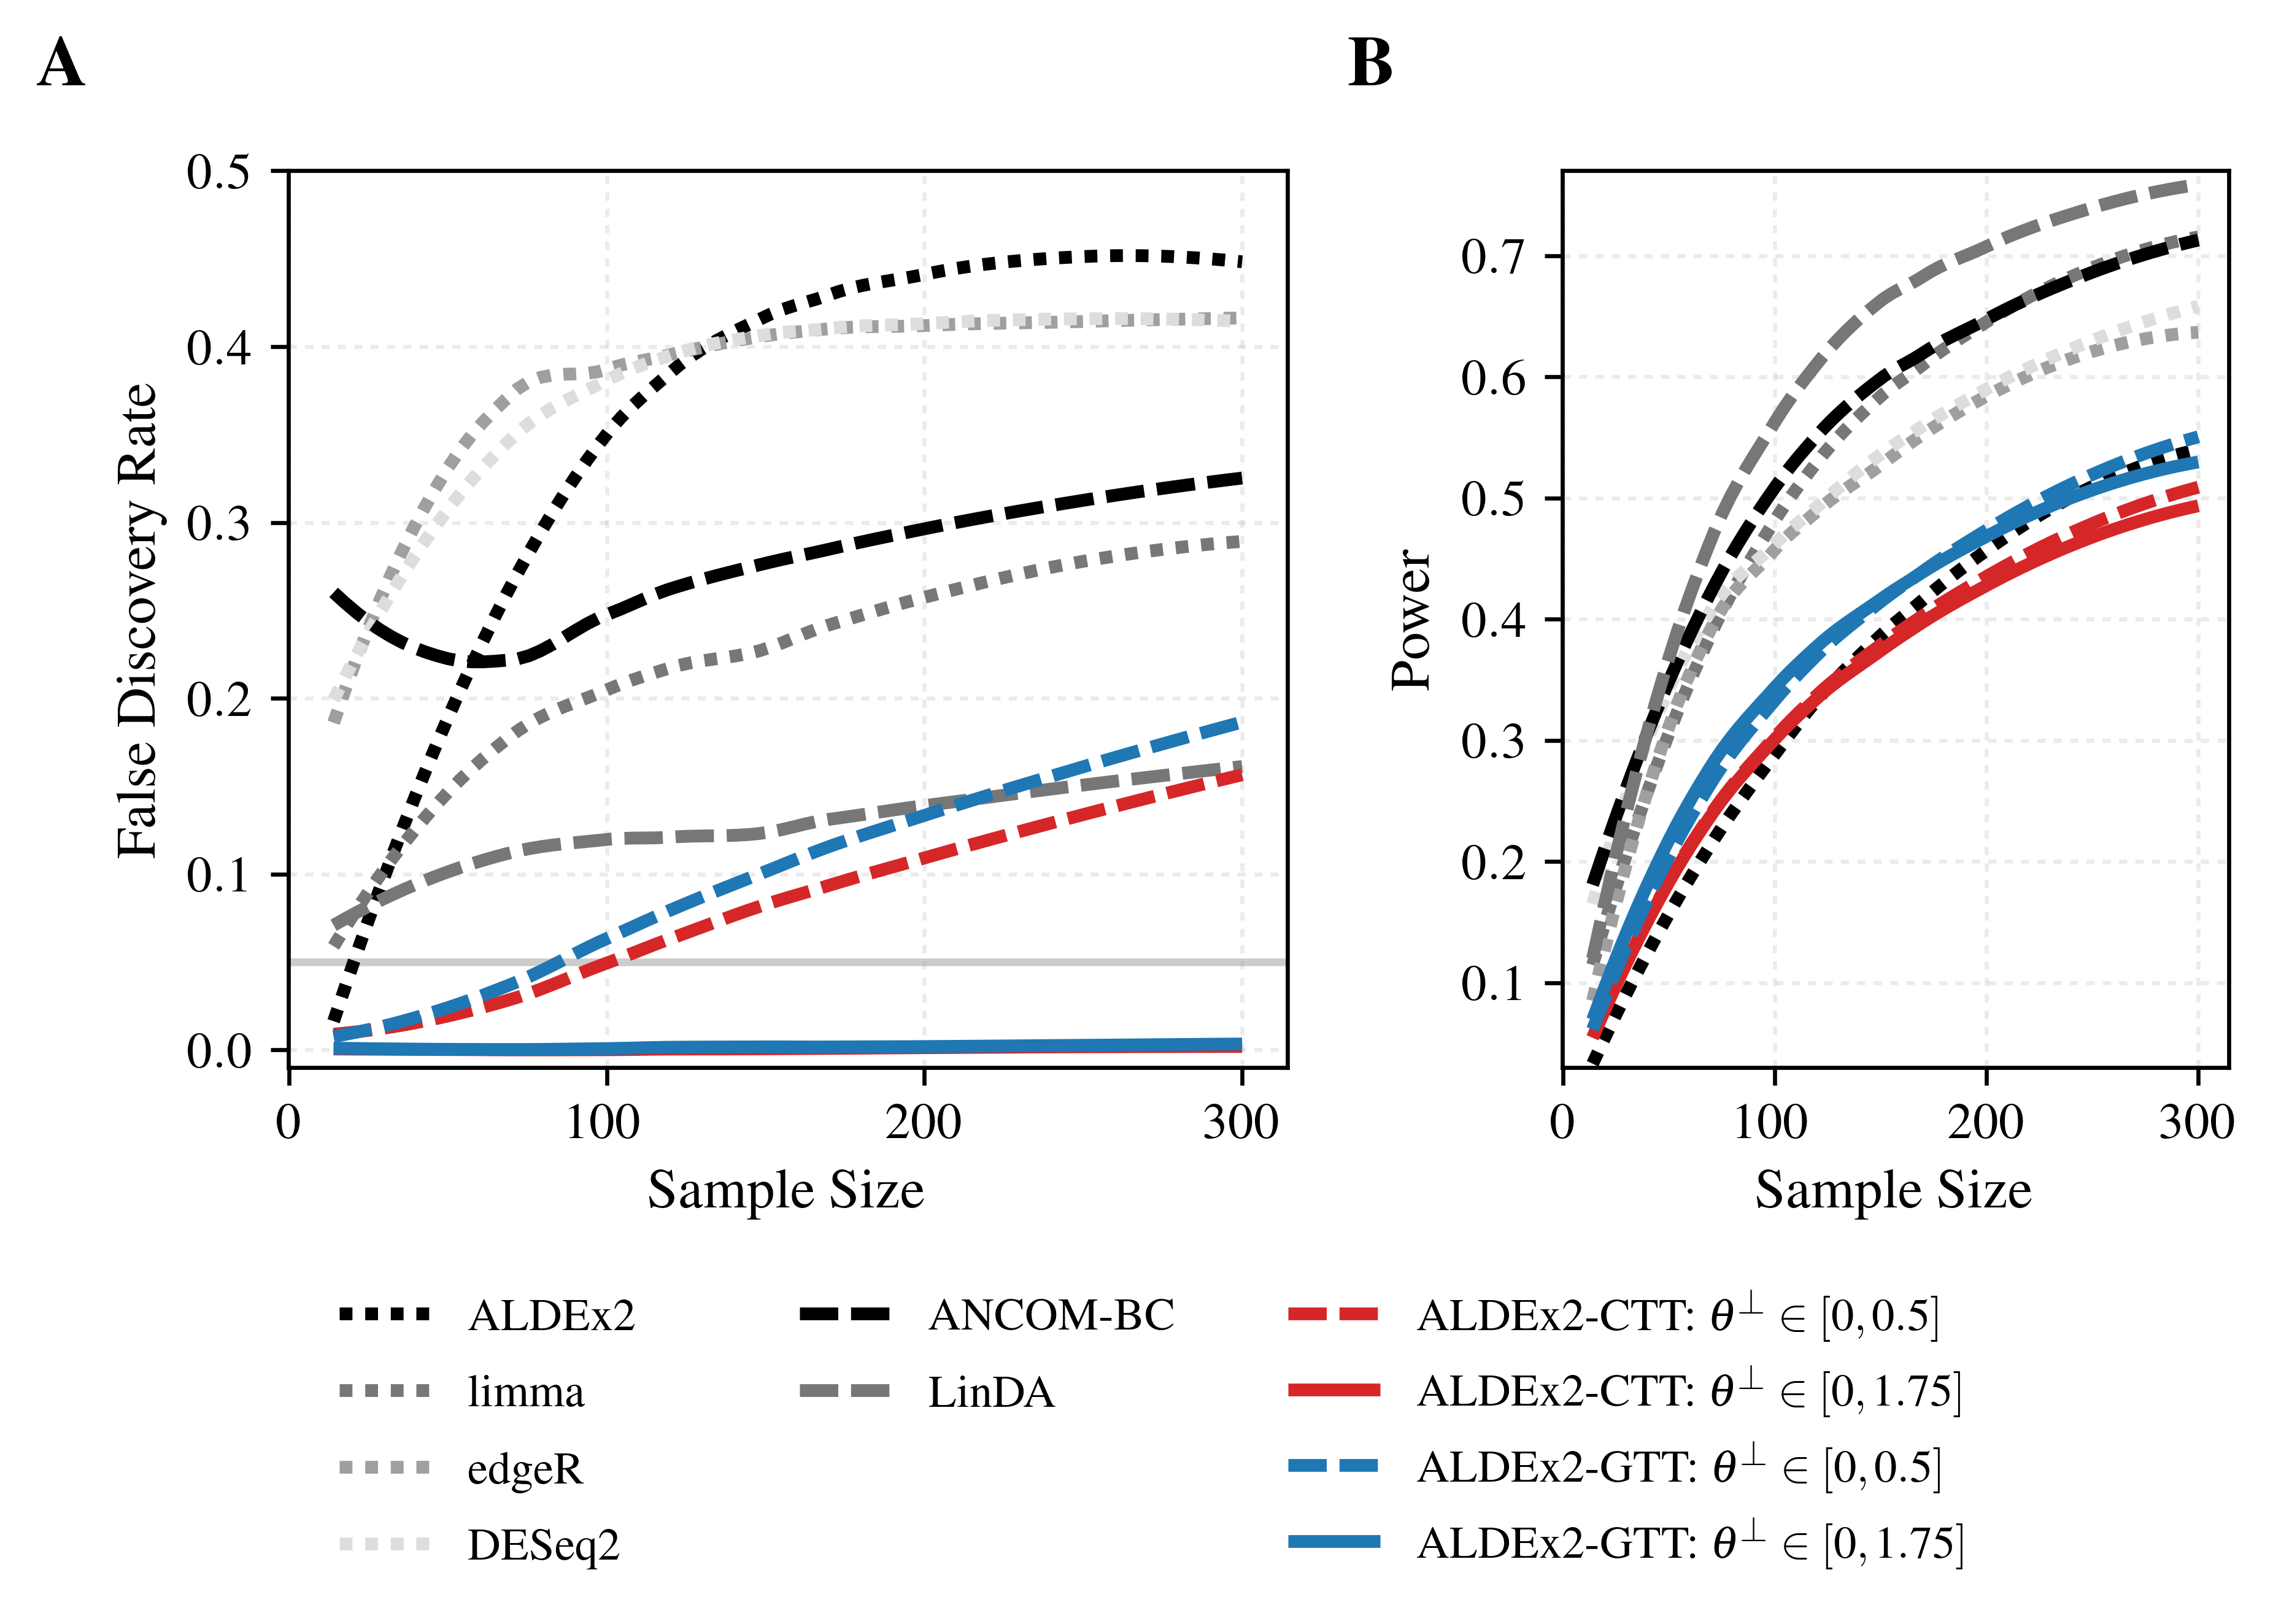

In [44]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

gs_kw = dict(width_ratios=[1.5,1], height_ratios=[1])

width = 6.8
height = 4.2
dpi = 600
pw = width*dpi
ph = height*dpi

fig, axs = plt.subplot_mosaic([["A", "B"]], figsize=(pw/dpi, ph/dpi),
                              dpi=dpi, gridspec_kw=gs_kw)

axs["A"].set_ylim(-0.01, 0.5)

sns.lineplot(data=df3, x="x", y="y", hue="group", style="group", palette=palette, ax=axs["A"], linewidth=2.5,
             dashes=dashes)
axs["A"].set_xlabel("Sample Size", fontsize=11)
axs["A"].set_ylabel("False Discovery Rate", fontsize=11)
axs["A"].grid(dashes=(2,2), alpha=0.25)
axs["A"].axhline(y=0.05, linestyle="solid", linewidth=1.5, color="gray", zorder=-5, alpha=0.4)
axs["A"].xaxis.set_tick_params(labelsize=10)
axs["A"].yaxis.set_tick_params(labelsize=10)
axs["A"].get_legend().remove()

axs["B"].set_ylim(0.03, 0.77)
sns.lineplot(data=df4, x="x", y="y", hue="group", style="group", palette=palette, ax=axs["B"], linewidth=2.5,
             dashes=dashes)
axs["B"].set_xlabel("Sample Size", fontsize=11)
axs["B"].set_ylabel("Power", fontsize=11)
axs["B"].grid(dashes=(2,2), alpha=0.25)
axs["B"].xaxis.set_tick_params(labelsize=10)
axs["B"].yaxis.set_tick_params(labelsize=10)


fig.subplots_adjust(bottom=0.3, wspace=0.33)
handles, labels = axs["B"].get_legend_handles_labels()


axs["A"].text(-0.2, 1.15, r"\textbf{A}", transform=axs["A"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["B"].text(-0.25, 1.15, r"\textbf{B}", transform=axs["B"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
if main_plot:
    leg = axs["A"].legend(handles=handles[0:4], labels=labels[0:4], ncol=1, loc='upper center', 
                          bbox_to_anchor=(0.2, -0.21), fancybox=False, shadow=False,
                          fontsize=9, frameon=False, labelspacing=0.75)
    axs["A"].add_artist(leg)
    leg2 = axs["A"].legend(handles=handles[4:6], labels=labels[4:6], ncol=1, loc='upper center', 
                          bbox_to_anchor=(0.7, -0.21), fancybox=False, shadow=False,
                          fontsize=9, frameon=False, labelspacing=0.75)
    leg3 = axs["B"].legend(handles=handles[6:12], labels=labels[6:12], ncol=1, loc='upper center', 
                           bbox_to_anchor=(0.1, -0.2), fancybox=False, shadow=False,
                           fontsize=9, frameon=False)
else:
    leg3 = axs["B"].legend(handles=handles, labels=labels, ncol=4, loc='upper center', 
                       bbox_to_anchor=(-0.5, -0.2), fancybox=False, shadow=False,
                       fontsize=9, frameon=False)

In [45]:
if main_plot:
    fig.savefig("../../figures/Figure_2.png", bbox_inches='tight')
else:
    fig.savefig("../../figures/Figure_S2.png", bbox_inches='tight')

<Axes: xlabel='Microbe Index \\#', ylabel='Log Fold Change'>

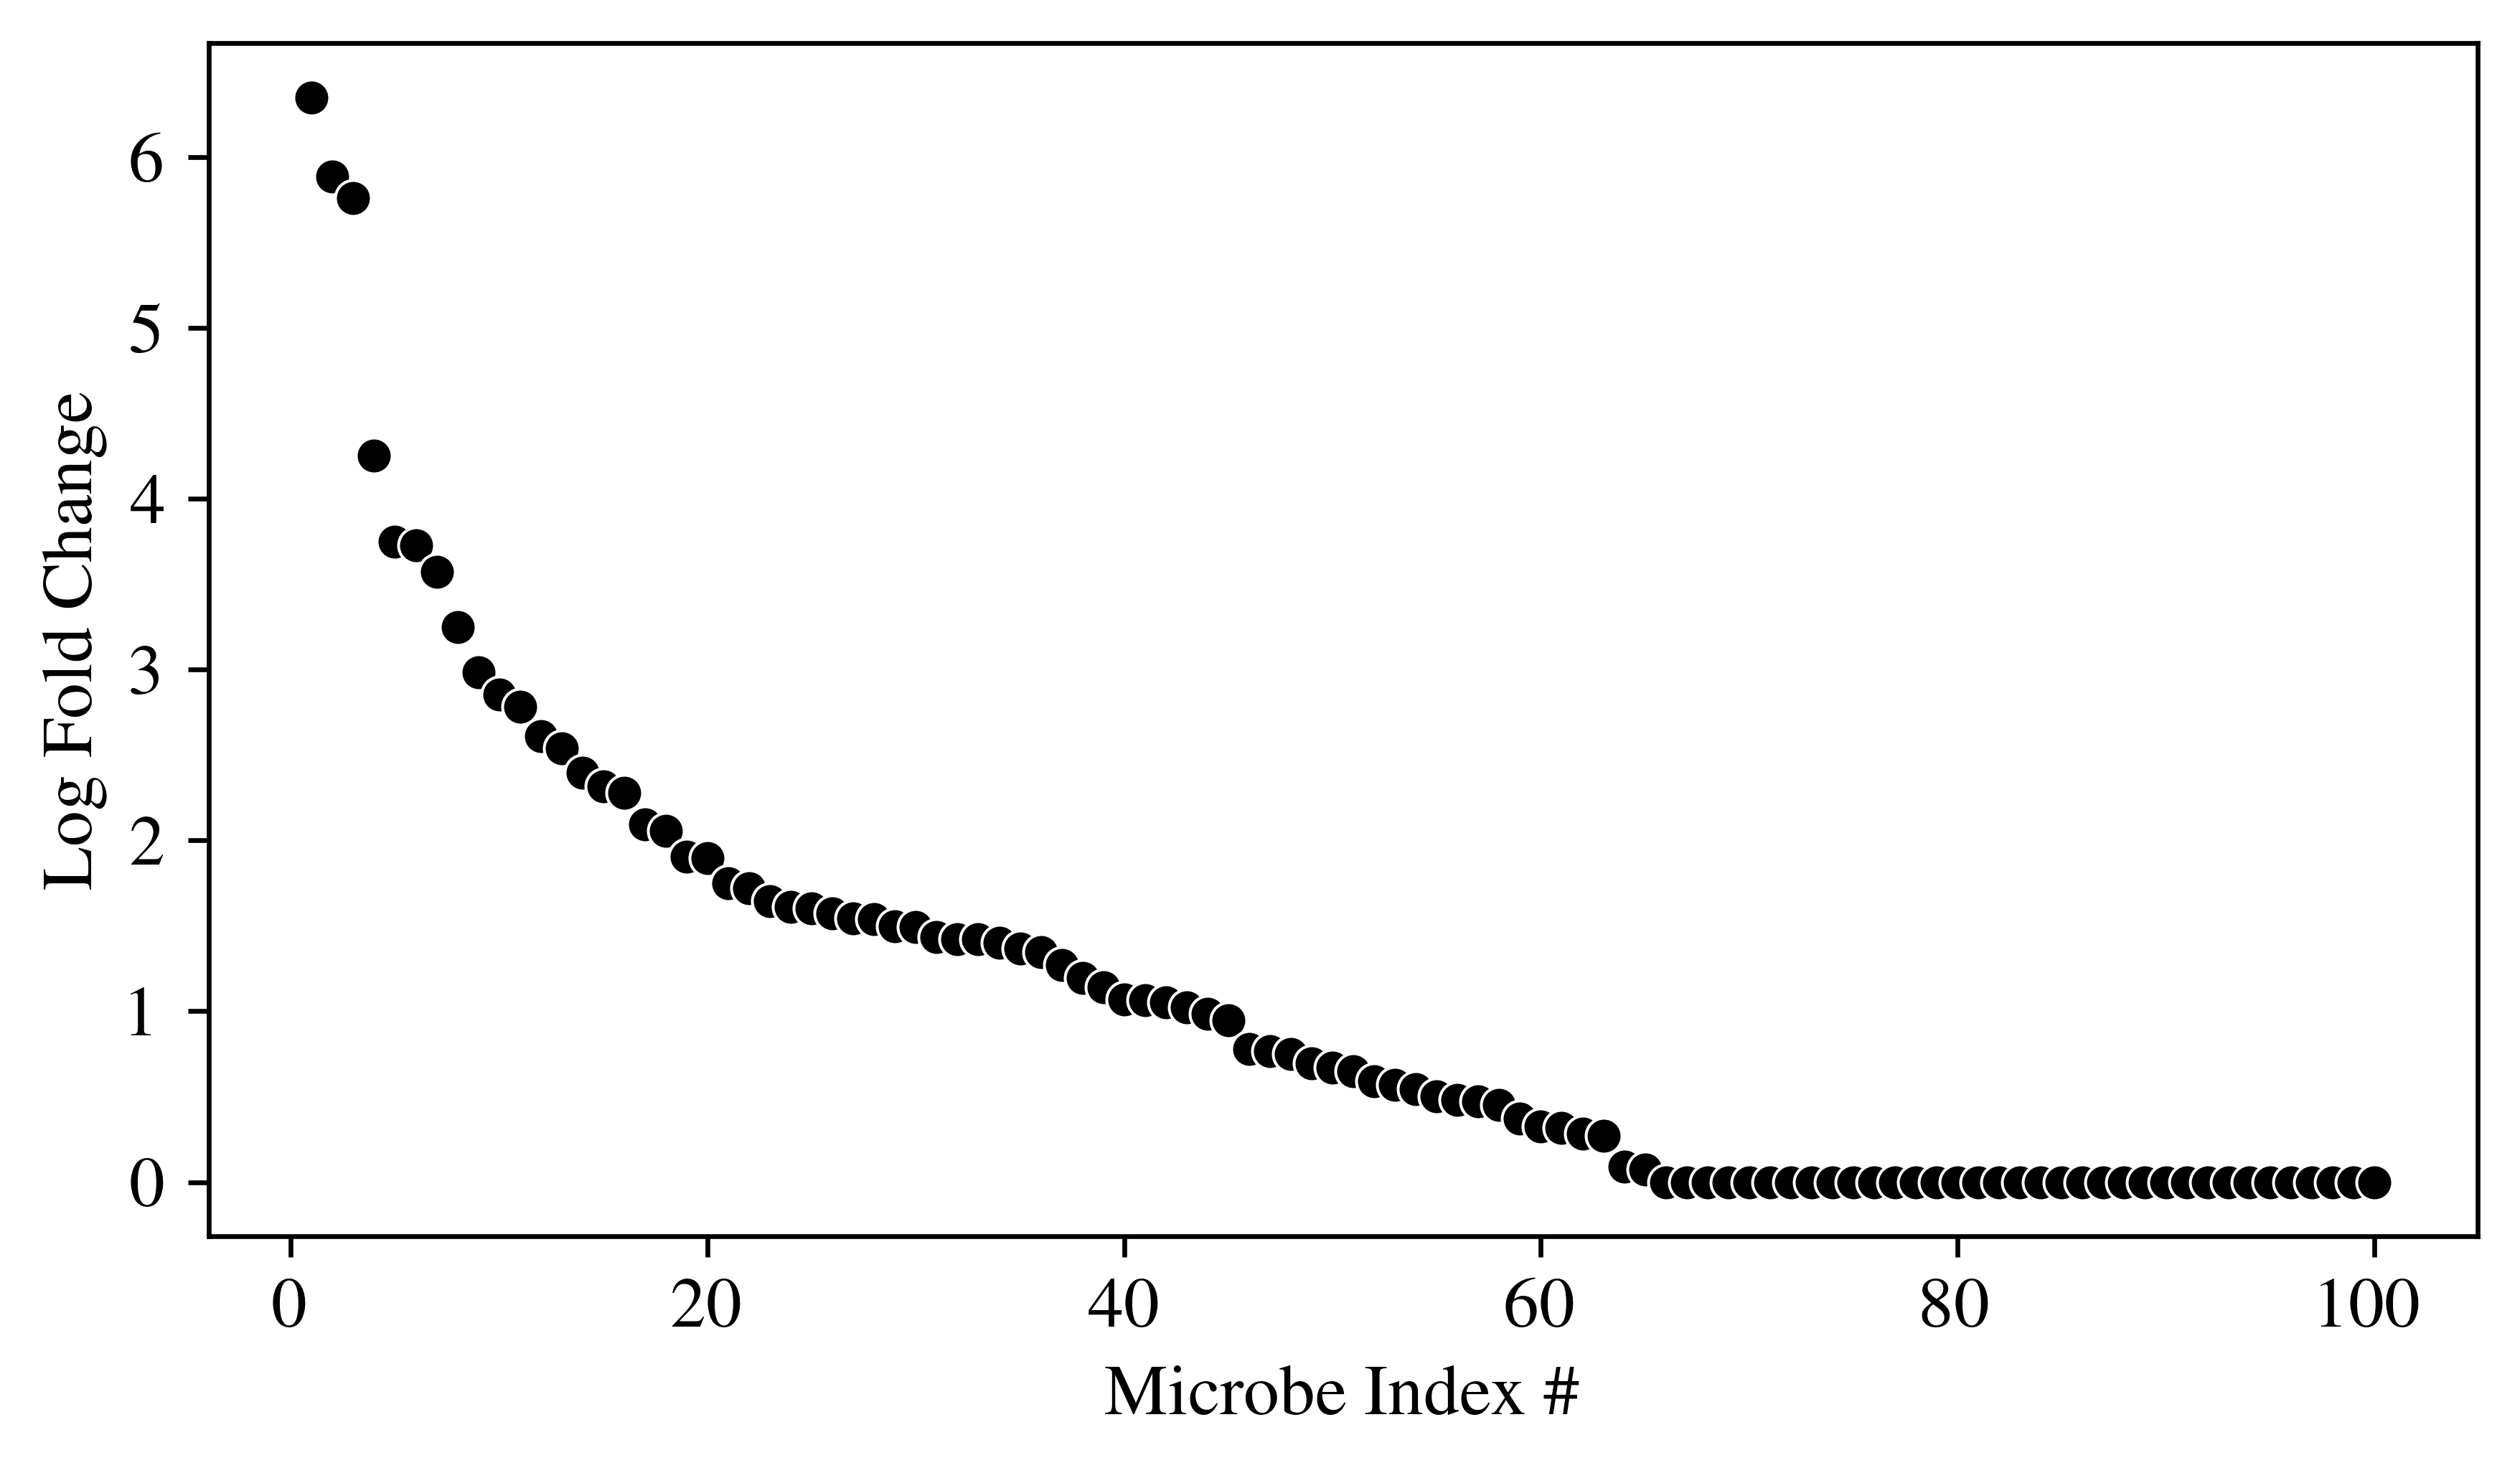

In [6]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

width = 6.8
height = 3.6
dpi = 600
pw = width*dpi
ph = height*dpi
fig, axs = plt.subplots(figsize=(pw/dpi, ph/dpi), dpi=dpi, nrows=1, height_ratios=[1])
#axs[0].axhline(0, ls='--', color="gray", zorder=0)
#axs[0].set_xlim(0,99)
axs.set_xlabel("Microbe Index \\#")
axs.set_ylabel("Log Fold Change")
sns.scatterplot(data=df2, x=df2.index.tolist(), y="lfcs", ax=axs, color="black")

In [68]:
fig.savefig("../../figures/Figure_S1.png", bbox_inches='tight')